https://www.mathematik.uni-marburg.de/~lohoefer/biologie/Schnelltest-nach-%20David.pdf

https://search.r-project.org/CRAN/refmans/EnvStats/html/rosnerTest.html



In [7]:
import numpy as np
from scipy.stats import norm

def critical_value_dhp(n, alpha): #=0.05):
    if n < 3:
        raise ValueError("Sample size must be at least 3")

    # Approximate critical value calculation
    # Adjusting the formula to use the z-score for the normal distribution
    z_alpha = norm.ppf(1 - alpha / 2)  # two-tailed
    critical_value = z_alpha * np.sqrt(2 * np.log(n))

    return critical_value

# Example usage:
sample_sizes = [3, 4, 5, 10, 20, 30, 50, 100]
alpha = 0.1
critical_values = {n: critical_value_dhp(n, alpha) for n in sample_sizes}

for n, cv in critical_values.items():
    print(f"Sample size: {n}, Critical value: {cv:.4f}")


Sample size: 3, Critical value: 2.4382
Sample size: 4, Critical value: 2.7389
Sample size: 5, Critical value: 2.9511
Sample size: 10, Critical value: 3.5298
Sample size: 20, Critical value: 4.0262
Sample size: 30, Critical value: 4.2900
Sample size: 50, Critical value: 4.6009
Sample size: 100, Critical value: 4.9919


https://www.r-project.org/doc/Rnews/Rnews_2006-2.pdf

Sample size: 3, Calculated value: 1.78, Corrected value: 1.79, tab_gu: 1.782, delta: 0.0047, delta%: 0.26%
Sample size: 4, Calculated value: 2.08, Corrected value: 2.03, tab_gu: 2.04, delta: -0.0059, delta%: -0.29%
Sample size: 5, Calculated value: 2.32, Corrected value: 2.22, tab_gu: 2.22, delta: 0.0002, delta%: 0.01%
Sample size: 6, Calculated value: 2.51, Corrected value: 2.37, tab_gu: 2.37, delta: -0.0023, delta%: -0.10%
Sample size: 7, Calculated value: 2.67, Corrected value: 2.49, tab_gu: 2.49, delta: -0.0007, delta%: -0.03%
Sample size: 8, Calculated value: 2.81, Corrected value: 2.59, tab_gu: 2.59, delta: 0.0027, delta%: 0.10%
Sample size: 9, Calculated value: 2.93, Corrected value: 2.68, tab_gu: 2.68, delta: 0.0028, delta%: 0.10%
Sample size: 10, Calculated value: 3.04, Corrected value: 2.76, tab_gu: 2.76, delta: 0.0028, delta%: 0.10%
Sample size: 11, Calculated value: 3.13, Corrected value: 2.83, tab_gu: 2.84, delta: -0.0051, delta%: -0.18%
Sample size: 12, Calculated value: 

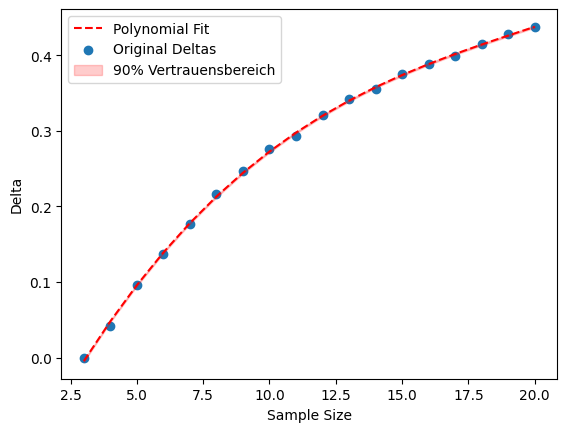

f(x) = -0.19491 + 0.07207*x^1 + -0.00304*x^2 + 0.00005*x^3


In [5]:
# Tabellierte Werte vs. berechnete Werte + PolyFit der Deltas

import numpy as np
from scipy.stats import t

def calculate_critical_value(n, alpha): #=0.05):
    if n < 3:
        raise ValueError("Sample size must be at least 3")
    
    # Calculate the degrees of freedom
    df = n - 2
    
    # Calculate the t critical value for the given alpha
    t_critical = t.ppf((1 - alpha) / (n * (n - 1)), df)
    
    # Calculate G using the formula
    G = abs(t_critical) * np.sqrt(2* (n-1) / (n - 2 + t_critical**2))
    
    return G

# Example usage:
sample_sizes = [3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
tab_gu = [1.782,2.04,2.22,2.37,2.49,2.59,2.68,2.76,2.84,2.90,2.96,3.02,3.07,3.12,3.17,3.21,3.25,3.29]
alpha = 0.10
critical_values = {n: calculate_critical_value(n, alpha) for n in sample_sizes}

#for n, cv in critical_values.items():
#    print(f"Sample size: {n}, Critical value: {cv:.2f}, tab_gu: {tab_gu[n-3]}, delta: {cv-tab_gu[n-3]:.4f}, delta%: {(cv-tab_gu[n-3])/tab_gu[n-3]*100:.2f}%")

import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Calculate critical values and deltas
calculated_values = [calculate_critical_value(n, alpha=0.1) for n in sample_sizes]
deltas = [calc - tab for calc, tab in zip(calculated_values, tab_gu)]

# Fit a polynomial regression to the deltas
degree = 3  # You can adjust the degree as needed
coefficients = np.polyfit(sample_sizes, deltas, degree)
poly = Polynomial(coefficients[::-1])  # Polynomial expects coefficients in reverse order

# Vorhersagen des Polynomfits
predicted_deltas = poly(np.array(sample_sizes))

# Standardfehler der Vorhersagen berechnen
# Hier wird eine vereinfachte Methode zur Demonstration verwendet
# Für genauere Berechnungen sollten Residuen und die Anzahl der Freiheitsgrade berücksichtigt werden
SE = np.std(deltas - predicted_deltas) / np.sqrt(len(sample_sizes))

# t-Wert für 90% Vertrauensintervall
alpha = 0.1
df = len(sample_sizes) - degree - 1
t_value = t.ppf(1 - alpha/2, df)

# Vertrauensbereich berechnen
confidence_interval = t_value * SE

# Obere und untere Grenze des Vertrauensbereichs
upper_bound = predicted_deltas + confidence_interval
lower_bound = predicted_deltas - confidence_interval

# Apply the correction to the calculated values
corrected_values = [calculate_critical_value(n, alpha=0.1) - poly(np.array([n]))[0] for n in sample_sizes]

# Print the corrected values
for n, cv, corrected_cv, tab in zip(sample_sizes, calculated_values, corrected_values, tab_gu):
    delta_corrected = corrected_cv - tab
    delta_corrected_pct = (delta_corrected / tab) * 100
    print(f"Sample size: {n}, Calculated value: {cv:.2f}, Corrected value: {corrected_cv:.2f}, tab_gu: {tab}, delta: {delta_corrected:.4f}, delta%: {delta_corrected_pct:.2f}%")

# Optional: Plot the original deltas and the polynomial fit
plt.plot(sample_sizes, predicted_deltas, label="Polynomial Fit", color='red', linestyle='--')
plt.scatter(sample_sizes, deltas, label="Original Deltas")
plt.fill_between(sample_sizes, lower_bound, upper_bound, color='red', alpha=0.2, label="90% Vertrauensbereich")
plt.xlabel("Sample Size")
plt.ylabel("Delta")
plt.legend()
plt.show()

# Extrahieren der Koeffizienten
coeffs = poly.coef

# Erstellen der Formelzeichenkette
formula = "f(x) = "
for i, coeff in enumerate(coeffs):
    if i == 0:
        formula += f"{coeff:.5f}"
    else:
        formula += f" + {coeff:.5f}*x^{i}"

# Ausgabe der Formel
print(formula)

In [8]:
# Another example
import numpy as np
from scipy.stats import t

def calculate_critical_values(n, alpha=0.05):
    if n < 3:
        raise ValueError("Sample size must be at least 3")
    
    # Degrees of freedom
    df = n - 2
    
    # Calculate the t critical value for the upper limit
    t_critical = t.ppf(1 - alpha / (    n * (n - 1)), df)
    t_upper    = t.ppf(1 - alpha / (1 * n * (n - 1)), df)
    # Calculate the t critical value for the given alpha
        
    # Calculate the t critical value for the lower limit
    t_lower = t.ppf(alpha / (1 * n * (n - 1)), df)
    
    # Calculate G for the upper limit
    G_upper = np.sqrt((2 * (n - 1) * t_upper**2) / (n - 2 + t_upper**2))
    
    # Calculate G for the lower limit
    #G_lower = np.sqrt((2 * (n - 1) * t_lower**2) / (n - 2 + t_lower**2))

    t_critical_lower = t.ppf(alpha / (n * (n - 1)), df)
    
    # Calculate G for the lower limit
    G_lower = np.sqrt((2 * (n - 1) * t_critical_lower**2) / (n - 2 + t_critical_lower**2))

    return G_upper, G_lower

# Example usage:
sample_sizes = [3, 4, 5, 10, 20, 30, 50, 100]
alpha = 0.1
critical_values = {n: calculate_critical_values(n, alpha) for n in sample_sizes}

for n, (cv_upper, cv_lower) in critical_values.items():
    print(f"Sample size: {n}, Upper limit: {cv_upper:.4f}, Lower limit: {cv_lower:.4f}")


Sample size: 3, Upper limit: 1.9973, Lower limit: 1.9973
Sample size: 4, Upper limit: 2.4087, Lower limit: 2.4087
Sample size: 5, Upper limit: 2.7117, Lower limit: 2.7117
Sample size: 10, Upper limit: 3.5739, Lower limit: 3.5739
Sample size: 20, Upper limit: 4.3421, Lower limit: 4.3421
Sample size: 30, Upper limit: 4.7512, Lower limit: 4.7512
Sample size: 50, Upper limit: 5.2257, Lower limit: 5.2257
Sample size: 100, Upper limit: 5.8019, Lower limit: 5.8019


In [9]:
# Pearson Type III Distribution
import numpy as np
from scipy.stats import pearson3

def calculate_critical_values_pearson3(n, alpha=0.05):
    if n < 3:
        raise ValueError("Sample size must be at least 3")
    
    # Parameters for the Pearson type III distribution
    # Assuming a standard normal distribution (mean = 0, stddev = 1)
    mean = 0
    stddev = 1
    skew = 0
    
    # Calculate the upper critical value
    upper_critical_value = pearson3.ppf(1 - alpha, skew, loc=mean, scale=stddev)
    
    # Calculate the lower critical value
    lower_critical_value = pearson3.ppf(alpha, skew, loc=mean, scale=stddev)
    
    # Calculate G for upper limit
    G_upper = np.sqrt((2 * (n - 1) * upper_critical_value**2) / (n - 2 + upper_critical_value**2))
    
    # Calculate G for lower limit
    G_lower = np.sqrt((2 * (n - 1) * lower_critical_value**2) / (n - 2 + lower_critical_value**2))
    
    return G_upper, G_lower

# Example usage:
sample_sizes = [3, 4, 5, 10, 20, 30, 50, 100]
alpha = 0.1
critical_values = {n: calculate_critical_values_pearson3(n, alpha) for n in sample_sizes}

for n, (cv_upper, cv_lower) in critical_values.items():
    print(f"Sample size: {n}, Upper limit: {cv_upper:.4f}, Lower limit: {cv_lower:.4f}")


Sample size: 3, Upper limit: 1.5768, Lower limit: 1.5768
Sample size: 4, Upper limit: 1.6448, Lower limit: 1.6448
Sample size: 5, Upper limit: 1.6823, Lower limit: 1.6823
Sample size: 10, Upper limit: 1.7510, Lower limit: 1.7510
Sample size: 20, Upper limit: 1.7825, Lower limit: 1.7825
Sample size: 30, Upper limit: 1.7926, Lower limit: 1.7926
Sample size: 50, Upper limit: 1.8006, Lower limit: 1.8006
Sample size: 100, Upper limit: 1.8065, Lower limit: 1.8065


In [10]:
# Pearson Type II Distribution
import numpy as np
from scipy.stats import beta

def calculate_critical_values_pearson2(n, alpha=0.1):
    if n < 3 or n > 7:
        raise ValueError("Sample size must be between 3 and 7")
    
    # Shape parameters for the Pearson Type II distribution
    a = b = (n - 1) / 2
    
    # Calculate the critical value
    critical_value = beta.ppf(1 - alpha, a, b)
    
    return critical_value

# Example usage:
sample_sizes = [3, 4, 5, 6, 7]
alpha = 0.1
critical_values = {n: calculate_critical_values_pearson2(n, alpha) for n in sample_sizes}

for n, cv in critical_values.items():
    print(f"Sample size: {n}, Critical value: {cv:.4f}")


Sample size: 3, Critical value: 0.9000
Sample size: 4, Critical value: 0.8435
Sample size: 5, Critical value: 0.8042
Sample size: 6, Critical value: 0.7754
Sample size: 7, Critical value: 0.7534


In [12]:
import numpy as np
from scipy.special import gamma

def calculate_critical_values_pearson2(n, alpha=0.1):
    if n < 3:
        raise ValueError("Sample size must be at least 3")

    # Moments of the distribution u = w/s
    r = 2
    mu_r = (2 * (n-1) * gamma((n+1+r)/2) * gamma(n/2)) / (np.sqrt(np.pi) * gamma((n+r)/2) * gamma((n+1)/2))

    # Calculate the upper percentage points U_alpha
    z_alpha = np.sqrt(2) * gamma((n-1)/2) / gamma(n/2) * (1 - alpha)

    # Calculate the critical value u_alpha
    u_alpha = mu_r + z_alpha * np.sqrt(mu_r)
    
    return u_alpha

# Example usage:
sample_sizes = [3, 4, 5, 6, 7]
alpha = 0.1
critical_values = {n: calculate_critical_values_pearson2(n, alpha) for n in sample_sizes}

for n, cv in critical_values.items():
    print(f"Sample size: {n}, Critical value: {cv:.4f}")


Sample size: 3, Critical value: 5.5003
Sample size: 4, Critical value: 6.5517
Sample size: 5, Critical value: 7.6445
Sample size: 6, Critical value: 8.7527
Sample size: 7, Critical value: 9.8681


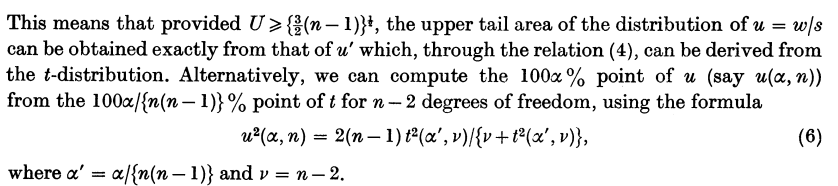 

  n | Go    | Umax  | t_Gu  | t_test
  3 | 1.997 | 1.732 | 1.782 | 1.260 | 0.5219
  4 | 2.409 | 2.121 | 2.040 | 1.472 | 0.5678
  5 | 2.712 | 2.449 | 2.220 | 1.638 | 0.5823
  6 | 2.949 | 2.739 | 2.370 | 1.773 | 0.5974
  7 | 3.143 | 3.000 | 2.490 | 1.886 | 0.6039
  8 | 3.308 | 3.240 | 2.590 | 1.984 | 0.6060
  9 | 3.449 | 3.464 | 2.680 | 2.070 | 0.6101
 10 | 3.574 | 3.674 | 2.760 | 2.146 | 0.6136
 11 | 3.685 | 3.873 | 2.840 | 2.215 | 0.6249
 12 | 3.785 | 4.062 | 2.900 | 2.278 | 0.6224
 13 | 3.875 | 4.243 | 2.960 | 2.335 | 0.6253
 14 | 3.958 | 4.416 | 3.020 | 2.387 | 0.6328
 15 | 4.034 | 4.583 | 3.070 | 2.436 | 0.6341


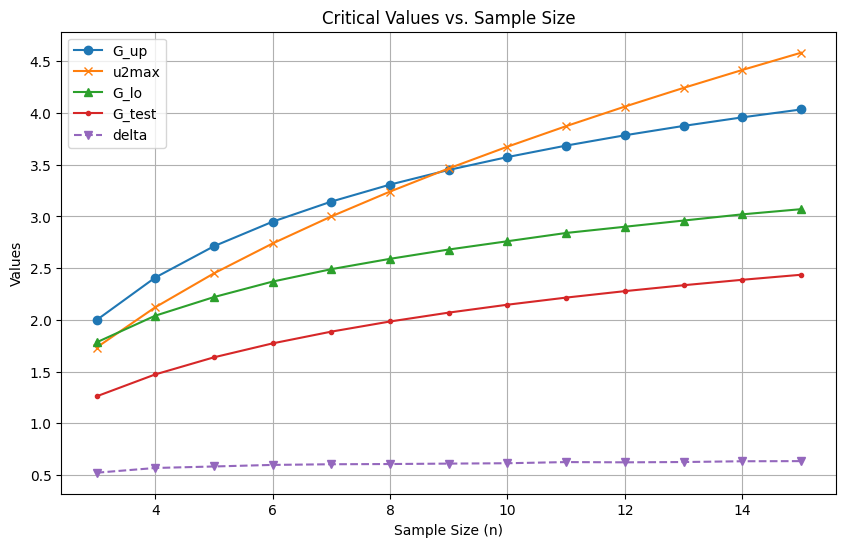

In [43]:
# WORKING SNIPPET
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

def calculate_critical_values(n, alpha=0.1):
    if n < 3:
        raise ValueError("Sample size must be at least 3")
        # Degrees of freedom
    alpha=0.1
    u2max = np.sqrt(3/2*(n-1))
    kn = -.9043+3.345*np.sqrt(np.log10(n))-0.4606*np.log10(n)
    tab_gu = [1.782,2.04,2.22,2.37,2.49,2.59,2.68,2.76,2.84,2.90,2.96,3.02,3.07,3.12,3.17,3.21,3.25,3.29]
    
    v = n - 2
    alpha_up = alpha / (n * (n - 1)) # u²(a,n)
    t_up     = t.ppf(alpha_up, v)    # Calculate the t value for the upper critical limit
    
    G_up = -t_up * np.sqrt(2 * (n - 1) / (n - 2 + t_up**2)) # Calculate G for the upper limit
    G_lo = tab_gu[n-3]

    alpha_test = (1 - alpha) / (n * (n - 1)) 
    t_test     = t.ppf(alpha_test, v)    
    G_test     = -t_test * np.sqrt((2 * (n - 1)) / (n - 2 + t_test**2)) 
    G_test     = -t_test * np.sqrt(     (n - 1)  / (n - 2 + t_test**2)) #* (n-1)/np.sqrt(n)

    #G_test     = -t_test * np.sqrt( ( 1/ ((n-1)*n**2)) / (n - 2 + t_test**2)) 
    #G_test /= np.sqrt(1 / (n - 2))
    #+.891 #+0.891-0.01*n

    return G_up, u2max, G_lo, kn, G_test

# Example usage:
sample_sizes = [3, 4, 5, 6,7,8,9,10,15, 20]
sample_sizes = list(range(3, 16))
alpha = 0.001
critical_values = {n: calculate_critical_values(n, alpha) for n in sample_sizes}
# Initialisieren der Listen für die Achsen
n_values = []
G_up_values = []
u2max_values = []
G_lo_values = []
G_test_values = []
delta = []

# Ausgabe der kritischen Werte
print("  n | Go    | Umax  | t_Gu  | t_test")
for n, (cv_up, cuv2max, cv_lo,cv_kn,g_test) in critical_values.items():
    print(f"{n:3} | {cv_up:.3f} | {cuv2max:.3f} | {cv_lo:.3f} | {g_test:.3f} | {abs(g_test-cv_lo):.4f}") 
    n_values.append(n)
    G_up_values.append(cv_up)
    u2max_values.append(cuv2max)
    G_lo_values.append(cv_lo)
    G_test_values.append(g_test)
    delta.append(abs(g_test-cv_lo))
    ##print(f"Sample size: {n}, Upper limit: {cv_upper:.4f}, Lower limit: {cv_lower:.4f}")

# Erstellen des Diagramms
plt.figure(figsize=(10, 6))

# Hinzufügen der Datenreihen
plt.plot(n_values, G_up_values, label='G_up', marker='o')
plt.plot(n_values, u2max_values, label='u2max', marker='x')
plt.plot(n_values, G_lo_values, label='G_lo', marker='^')
plt.plot(n_values, G_test_values, label='G_test', marker='.')
plt.plot(n_values, delta, label='delta', marker='v',linestyle='--')

# Hinzufügen von Beschriftungen und Legende
plt.xlabel('Sample Size (n)')
plt.ylabel('Values')
plt.title('Critical Values vs. Sample Size')
plt.legend()

# Anzeigen des Diagramms
plt.grid(True)
plt.show()

https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1002/wrcr.20392
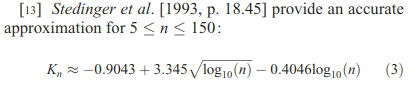 

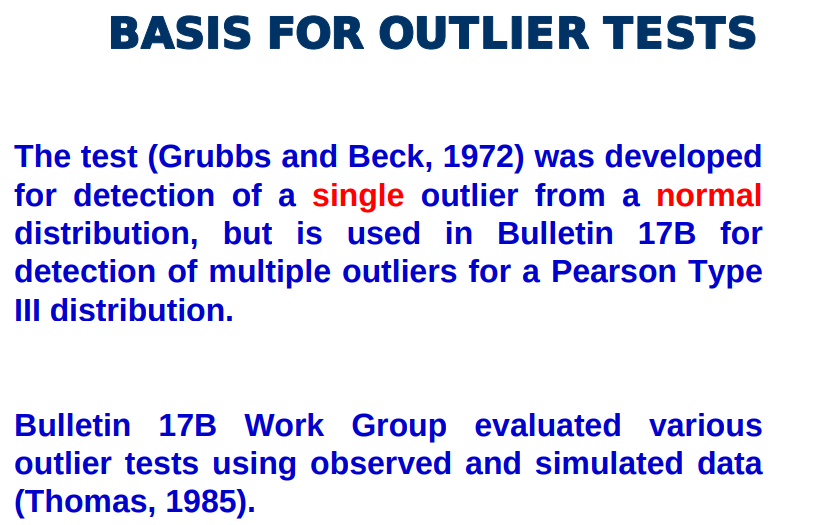